In [3]:
#AE Project

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m
import numpy.linalg as la
import scipy.linalg as sla
import csv

#Boeing Insitu ScanEagle Numbers (ON EARTH)
g = 9.81 #m/s^2
w1 = (18+14)/2 #avg empty structure weight in kg
w0 = 22 #kg (max takeoff weight)
Vmax = 41.2 #m/s max horisontal speed
Vcruise = (30 + 25)/2 #avg cruise speed in m/s
b = 3.11 #m (wingspan)
c = 3.11/13 #m (chord length using pixel counting)
Ceiling = 5944 #m
ServiceC = 4572 #m
Sref = b*c

#Boeing Insitu ScanEagle Numbers (ON TITAN)
gt = 1.352 #m/s^2 (t = Titan)
w1t = (w1)*gt #avg empty structure weight in kg
w0t = (w0)*gt #max takeoff weight in kg

    

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#read csv
temp = []
altitudes = []
with open("TitanTempAlt.csv",'r') as csvfile:
    plots = csv.reader(csvfile, dialect='excel', delimiter=',')
    for row in plots:
        try:
            altitudes.append(float(row[0]))
            temp.append(float(row[1]))
        except:
            continue
            

#helper function that linearly interpolates a value at a given altitude between two altitudes
def linear_interpolator(para1, para2, alt1, alt2, alt):
    alt_ratio = (alt - alt1) / (alt2 - alt1)
    return ((para2 - para1) * alt_ratio) + para1

def atms_conditions(alt):
    #get alt in km to work with csv data which is in km
    alt = alt/1000
    if alt > altitudes[-1] or alt <= 0:
        print("sorry this altitude is not in range of our function")
        return
    
    P0 = 146700 #Pa
    R  = 296.8  #J/kg * K
    rho0 = P0 / (temp[0] * R)
    g = 1.352 #m/s^2; just googled value for titan
    #exponential relation for density
    #print(alt)
    R_titan = 2575 #km
    P1 = P0 * math.exp(-alt/(R_titan))
    #print(rho0)
    iterator = 0 #describes state state of while loop (ie what altitude and temp to be at)
    next_temp = temp[0]
    #lists akin to vectors, allow for dynamic storage of values
    while altitudes[iterator] < alt:
        #get the temp and altitude of the next state of function
        next_temp = temp[iterator + 1]
        next_altitude = altitudes[iterator + 1]
        iterator += 1
    
    T_ceil = temp[iterator]
    T_floor = temp[iterator - 1]
    alt_ceil = altitudes[iterator]
    alt_floor = altitudes[iterator - 1]
    T1 = linear_interpolator(T_floor, T_ceil, alt_floor, alt_ceil, alt)
    #print(T_floor, T_ceil, T1)
    
    rho1 = P1 / (R * T1)
    
    return alt*1000, P1, T1, rho1

print(atms_conditions(5000))


(5000.0, 146415.42200979285, 83.66322009, 5.896419190468232)


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

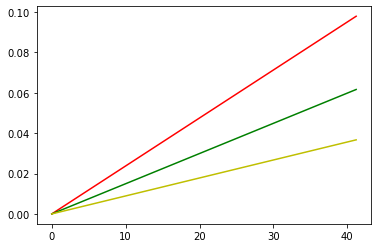

In [8]:
v = np.linspace(0,Vmax, 1000)

def cl(rho,v): #cl as a func of rho and v
    cl = w0t/(.5*rho*(v**2)*Sref)
    return cl

def cd(cl): #want cd as a func of cl as a func of rho and v
    cd = 0.0072 + ((cl**2)/(m.pi*e*AR)) #0.0072 is constant cd0
    return cd

def Tr(cl,cd):
    Tr = w0t/cl/cd
    return Tr

def Pr(Tr,v):
    Pr = Tr*v
    return Pr

def RC(Pr):
    RC = (1200-Pr)/w0t
    return RC

def RC():
    cl = w0t/(.5*rho*(v**2)*Sref)
    cd = 0.0072 + ((cl**2)/(m.pi*e*AR))
    Tr = w0t/cl/cd
    Pr = Tr*v
    RC = (1200-Pr)/w0t
    return RC


plt.plot(v, Pr(2.3769e-3,v), 'r', label = 'Pr 0ft')
plt.plot(v, Pr(1.4962e-3,v), 'g', label = 'Pr 15000ft')
plt.plot(v, Pr(8.90683e-4,v), 'y', label = 'Pr 30000ft')

plt.plot(v, Pa(2.3769e-3,v),'c', label = 'Pr 0ft')
plt.plot(v, Pa(1.4962e-3,v), 'm', label = 'Pr 15000ft')
plt.plot(v, Pa(8.90683e-4,v), 'k', label = 'Pr 30000ft')

plt.ylabel('Power (P) ft*lb/s')
plt.xlabel('Velocity (v) ft/s')
plt.title('Power (P) vs Velocity (v)')
plt.legend()
plt.show()
